In [11]:
import potpourri3d as pp3d
import pyvista as pv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import logmap_phase

In [3]:
# ionic model parameters
Vrest = 0.0
Vdep  = 1
Vthre = 0.15
c1  = 8
c2 = 1
gamma = 0.002
mu1 = 0.2
mu2 = 0.3
b = 0.5

# timestep and time of simulation
dt = 0.01
Tend = 500.0

# cycle length
r0 = 5.251926594117995
# capacitance
Cm   = 1.0    # [uF/cm^2]

In [4]:
LA = pv.read("LA.vtk")

pts = LA.points
elm = LA.cells.reshape(-1,4)[:,1:]

V, F = pts, elm

pv.save_meshio("LA_phase.vtk", LA)

In [5]:
solver = pp3d.MeshVectorHeatSolver(V, F, t_coef = 2)
M,K = logmap_phase.assembleParabolic(pts, elm)

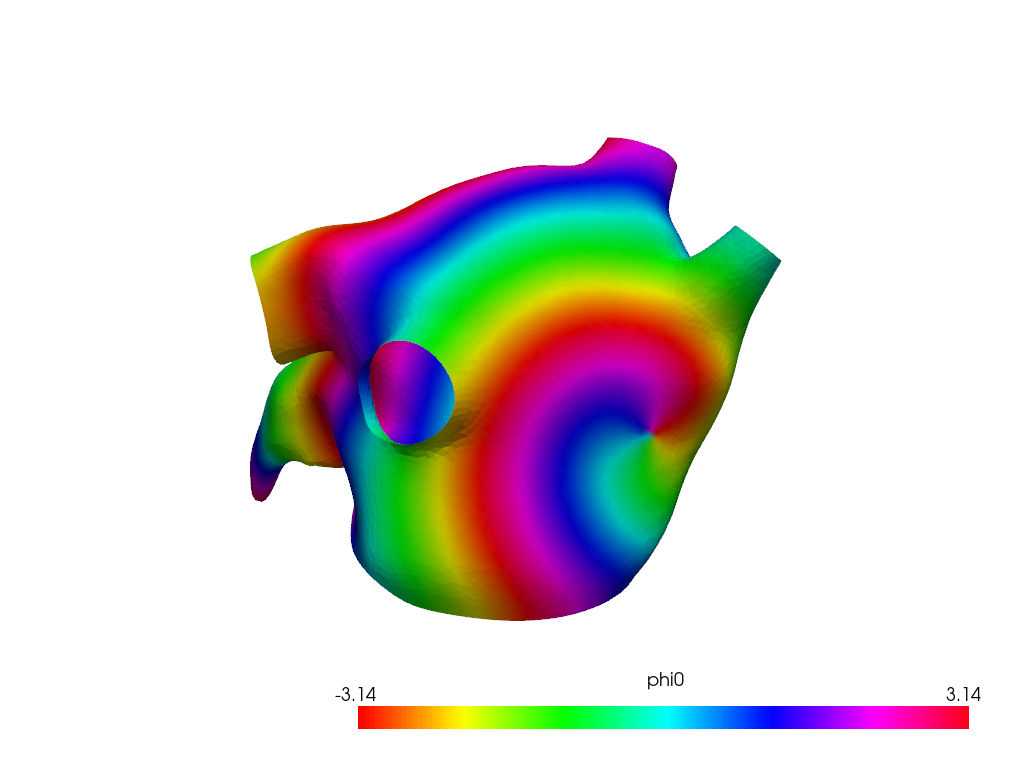

In [14]:
LA["phi0"] = logmap_phase.phase_s1(525,
                                   solver = solver,
                                   mesh = LA,
                                   M = M,
                                   K = K,
                                   Cm = Cm,
                                   r0 = r0,
                                   dt = 0.05,
                                   ndt = 200)[-1]
pv.save_meshio("LA_phase.vtk", LA)

plotter = pv.Plotter(off_screen = True)
plotter.add_mesh(LA, cmap = plt.get_cmap("hsv"), interpolate_before_map = False, scalar_bar_args={"n_labels" : 2, "title" : "phi0"})
plotter.camera_position = [(92, -151, -108),
                           (5.8, -8.4, 10.9),
                           (-0.3, 0.5, -0.8)]

plotter.show(jupyter_backend = "static")

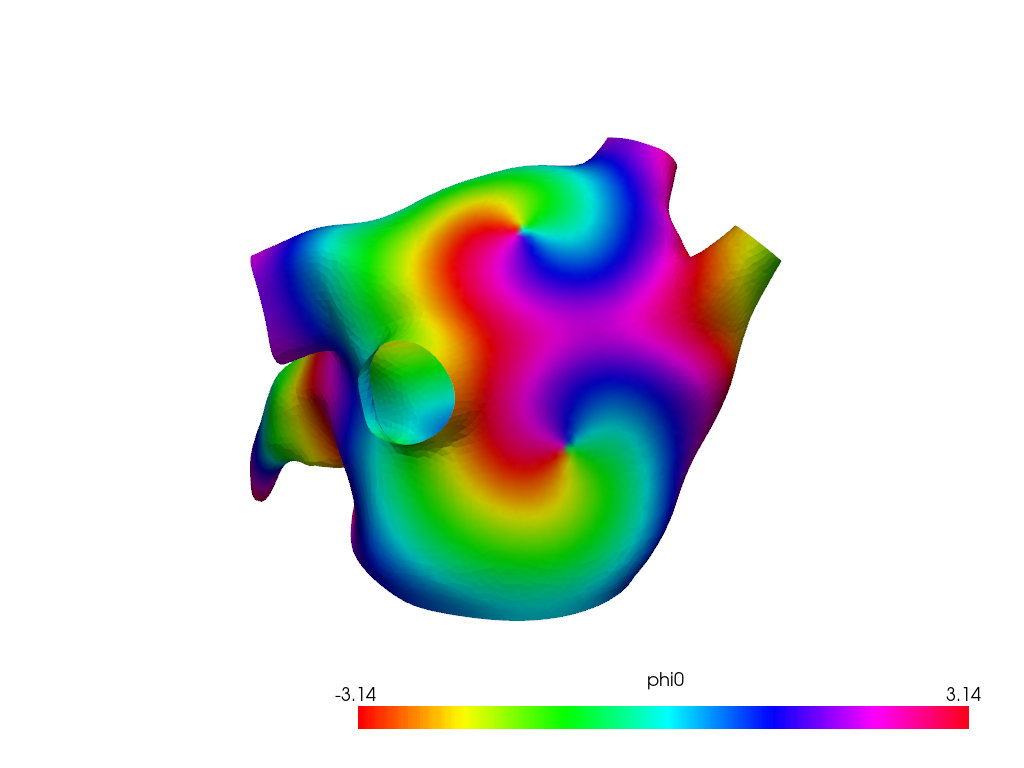

In [8]:
LA["phi0"] = logmap_phase.phase_s2([4264,7211],
                                   signs = [1, -1],
                                   solver = solver,
                                   mesh = LA,
                                   M = M,
                                   K = K,
                                   Cm = Cm,
                                   r0 = r0,
                                   dt = 0.05,
                                   ndt = 200)[-1]
pv.save_meshio("LA_phase.vtk", LA)

plotter = pv.Plotter(off_screen = True)
plotter.add_mesh(LA, cmap = plt.get_cmap("hsv"), interpolate_before_map = False, scalar_bar_args={"n_labels" : 2, "title" : "phi0"})
plotter.camera_position = [(92, -151, -108),
                           (5.8, -8.4, 10.9),
                           (-0.3, 0.5, -0.8)]

plotter.show(jupyter_backend = "static")

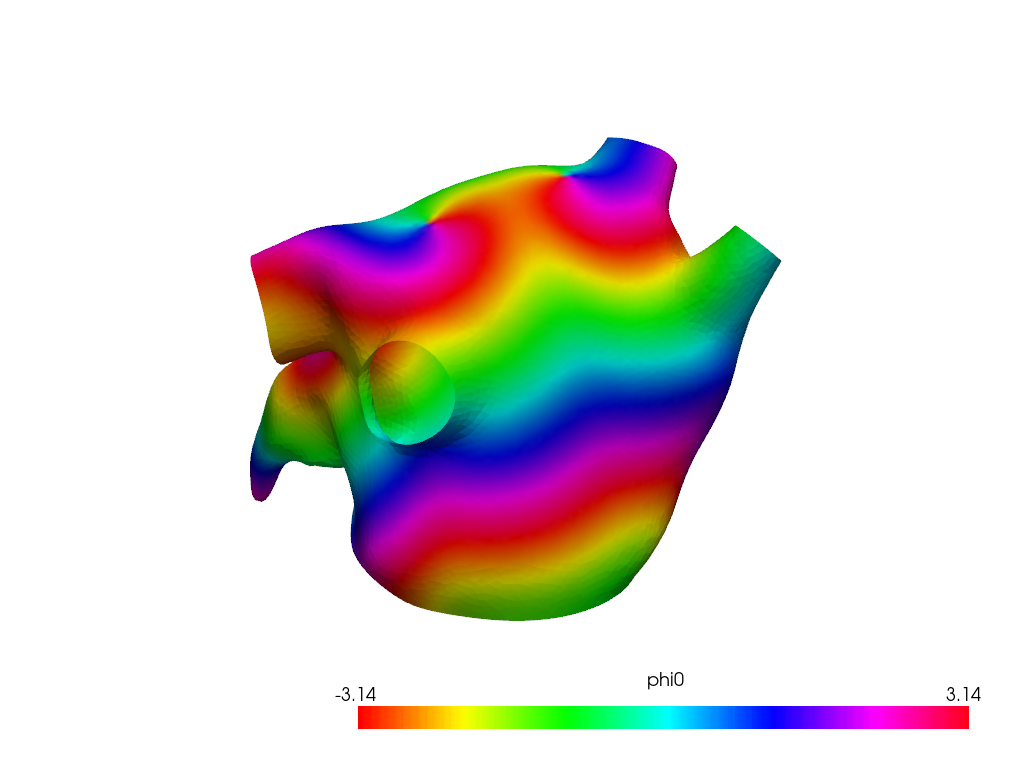

In [9]:
LA["phi0"] = logmap_phase.phase_s4([[4269,4855],[6663,7046]],
                                   signs = [[1, -1],[1, -1]],
                                   solver = solver,
                                   mesh = LA,
                                   M = M,
                                   K = K,
                                   Cm = Cm,
                                   r0 = r0,
                                   dt = 0.05,
                                   ndt = 200)[-1]

pv.save_meshio("LA_phase.vtk", LA)

plotter = pv.Plotter(off_screen = True)
plotter.add_mesh(LA, cmap = plt.get_cmap("hsv"), interpolate_before_map = False, scalar_bar_args={"n_labels" : 2, "title" : "phi0"})
plotter.camera_position = [(92, -151, -108),
                           (5.8, -8.4, 10.9),
                           (-0.3, 0.5, -0.8)]

plotter.show(jupyter_backend = "static")

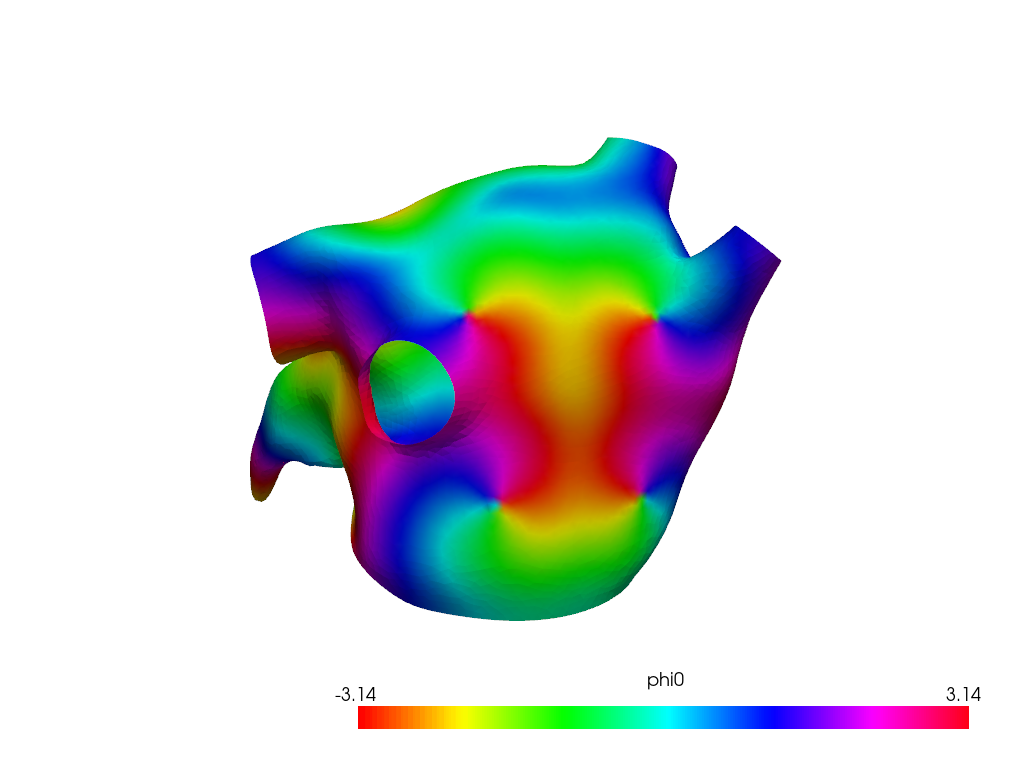

In [15]:
LA["phi0"] = logmap_phase.phase_s4([[1847,4816],[2737,2495],[5912,326]],
                                   signs = [[1, -1],[1, -1],[1, -1]],
                                   solver = solver,
                                   mesh = LA,
                                   M = M,
                                   K = K,
                                   Cm = Cm,
                                   r0 = r0,
                                   dt = 0.05,
                                   ndt = 200)[-1]

pv.save_meshio("LA_phase.vtk", LA)

plotter = pv.Plotter(off_screen = True)
plotter.add_mesh(LA, cmap = plt.get_cmap("hsv"), interpolate_before_map = False, scalar_bar_args={"n_labels" : 2, "title" : "phi0"})
plotter.camera_position = [(92, -151, -108),
                           (5.8, -8.4, 10.9),
                           (-0.3, 0.5, -0.8)]

plotter.show(jupyter_backend = "static")

In [12]:
u_state, r_state  = np.genfromtxt("ur_1s.txt").T
T_grid = np.linspace(0,1, num = u_state.shape[0])

In [13]:
logmap_phase.run_monodomain(phi_0 = LA["phi0"],
                            mesh = LA,
                            u_state = u_state,
                            r_state = r_state,
                            T_grid = T_grid,
                            Cm = Cm,
                            Vrest = 0.0,
                            Vdep  = 1,
                            Vthre = 0.15,
                            c1  = 8,
                            c2 = 1,
                            gamma = 0.002,
                            mu1 = 0.2,
                            mu2 = 0.3,
                            b = 0.5,
                            dt = 0.01,
                            Tend = 500.0,
                            fout = "monodomain_spirals_logmap.xdmf")

100%|██████████| 50000/50000 [00:31<00:00, 1612.44it/s]
